In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
application_data = pd.read_csv(r"C:\Users\vardh\Downloads\application_data.csv")
previous_application = pd.read_csv(r"C:\Users\vardh\Downloads\previous_application.csv")
columns_description = pd.read_csv(r"C:\Users\vardh\Downloads\columns_description (1).csv", encoding='ISO-8859-1')


In [8]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
columns_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [14]:
# Calculate the percentage of missing values per column
missing_data = application_data.isnull().sum() / len(application_data) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

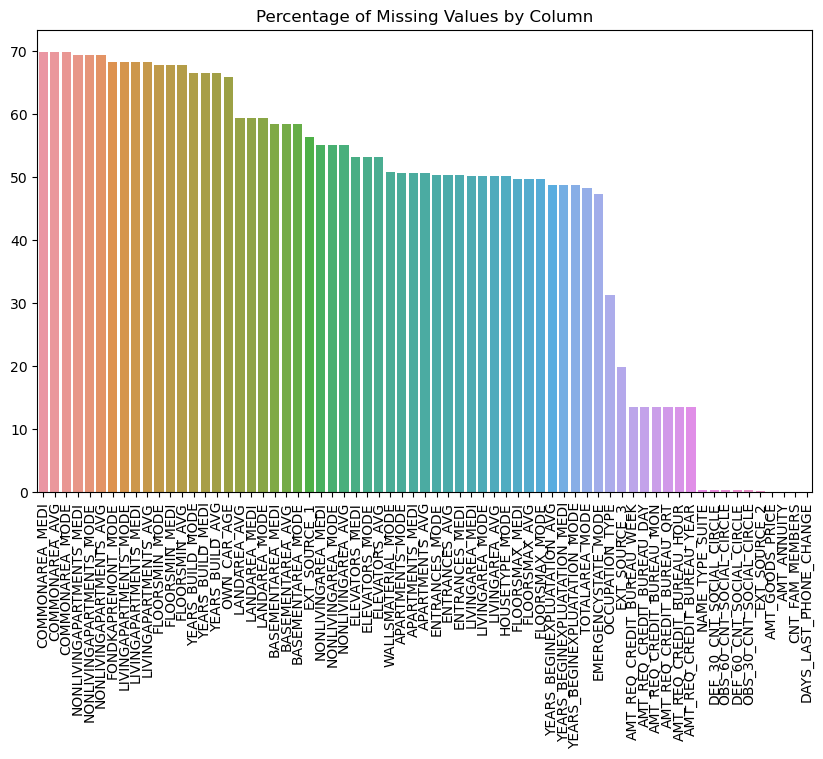

In [12]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values by Column")
plt.show()

In [15]:
# Dropping columns with more than 40% missing data
threshold = 40
columns_to_drop = missing_data[missing_data > threshold].index
application_data_cleaned = application_data.drop(columns=columns_to_drop, axis=1)

# Imputing remaining missing values with median for numerical columns and mode for categorical columns
for col in application_data_cleaned.columns:
    if application_data_cleaned[col].dtype == 'object':
        application_data_cleaned[col].fillna(application_data_cleaned[col].mode()[0], inplace=True)
    else:
        application_data_cleaned[col].fillna(application_data_cleaned[col].median(), inplace=True)


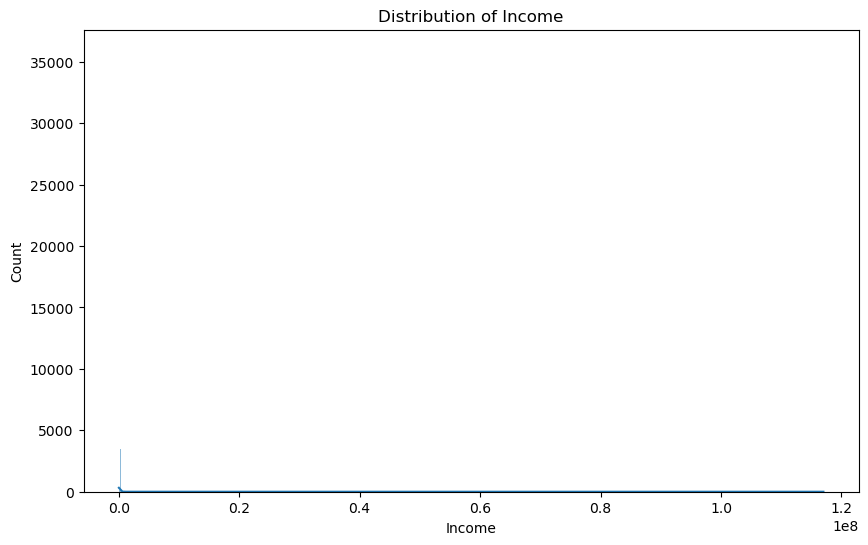

In [16]:
# Univariate analysis of Income
plt.figure(figsize=(10, 6))
sns.histplot(application_data_cleaned['AMT_INCOME_TOTAL'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.show()


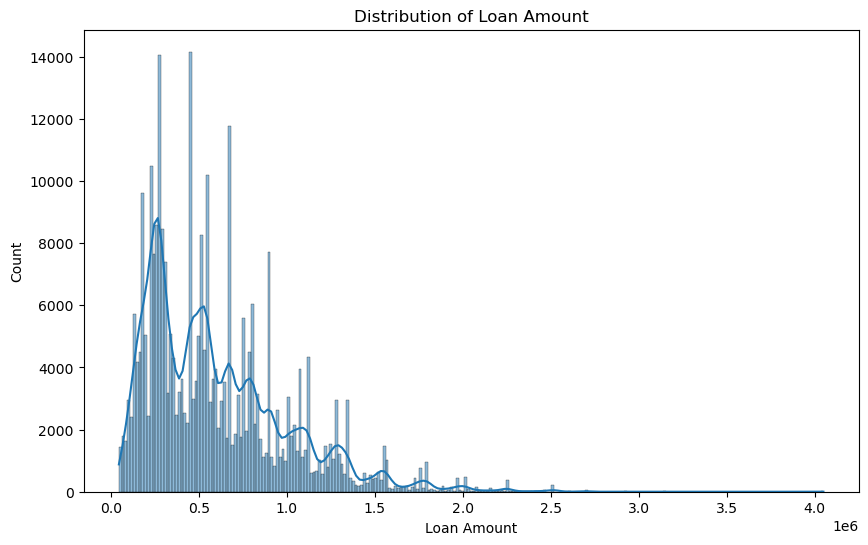

In [17]:
# Univariate analysis of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(application_data_cleaned['AMT_CREDIT'], kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

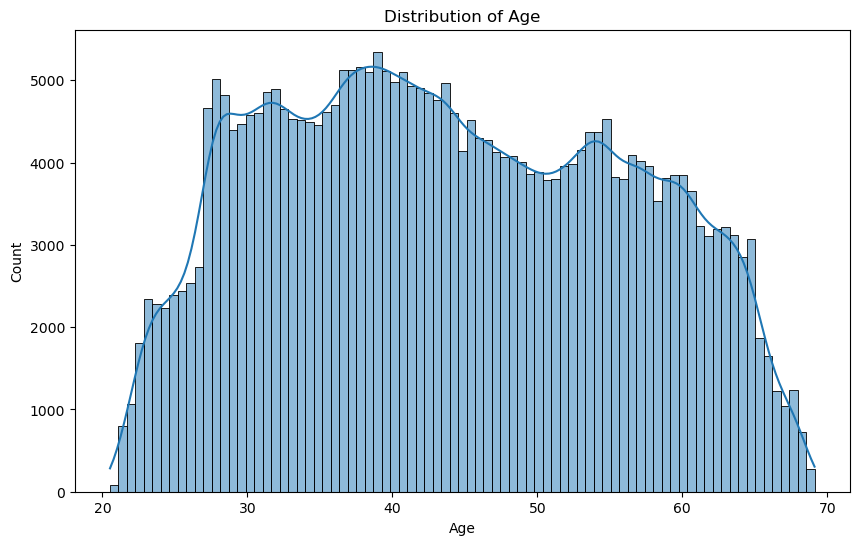

In [18]:
# Univariate analysis of Age
application_data_cleaned['AGE'] = application_data_cleaned['DAYS_BIRTH'] / -365
plt.figure(figsize=(10, 6))
sns.histplot(application_data_cleaned['AGE'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

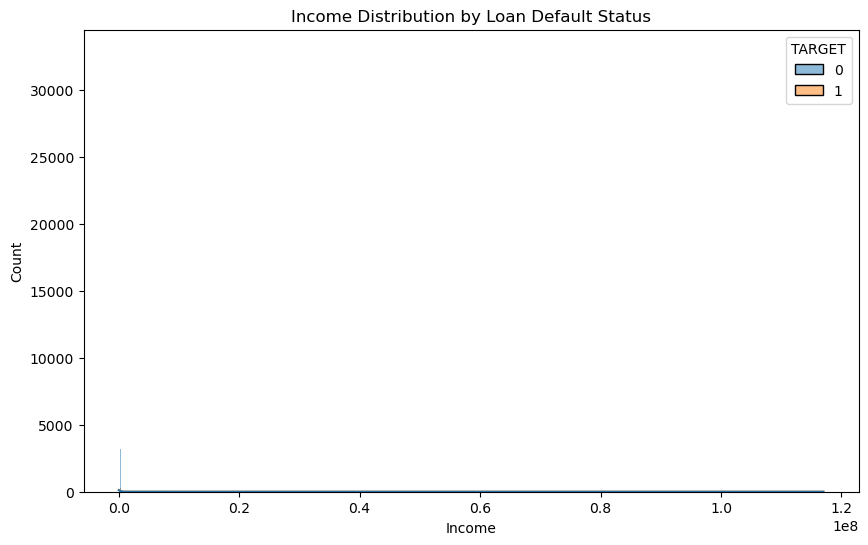

In [19]:
# Segmented Income distribution by target (0 = no default, 1 = default)
plt.figure(figsize=(10, 6))
sns.histplot(data=application_data_cleaned, x='AMT_INCOME_TOTAL', hue='TARGET', kde=True)
plt.title('Income Distribution by Loan Default Status')
plt.xlabel('Income')
plt.show()

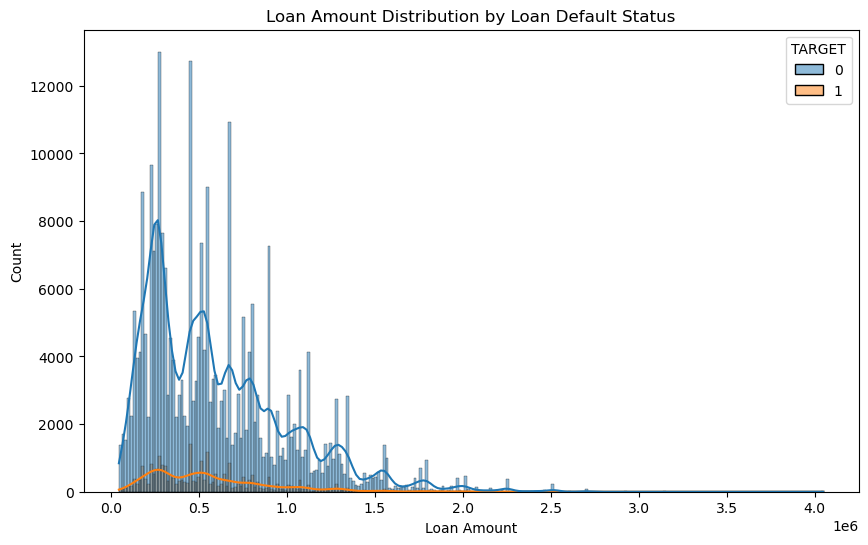

In [20]:
# Segmented Loan Amount distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=application_data_cleaned, x='AMT_CREDIT', hue='TARGET', kde=True)
plt.title('Loan Amount Distribution by Loan Default Status')
plt.xlabel('Loan Amount')
plt.show()

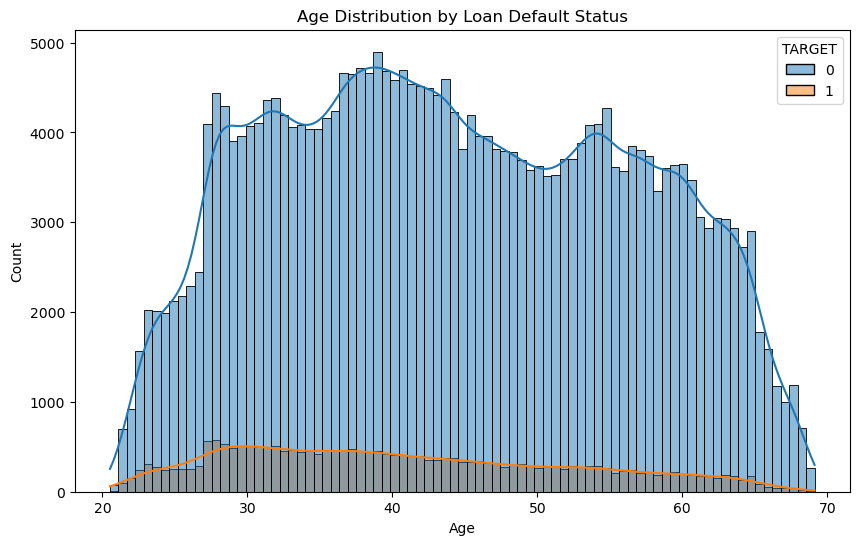

In [21]:
# Segmented Age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=application_data_cleaned, x='AGE', hue='TARGET', kde=True)
plt.title('Age Distribution by Loan Default Status')
plt.xlabel('Age')
plt.show()


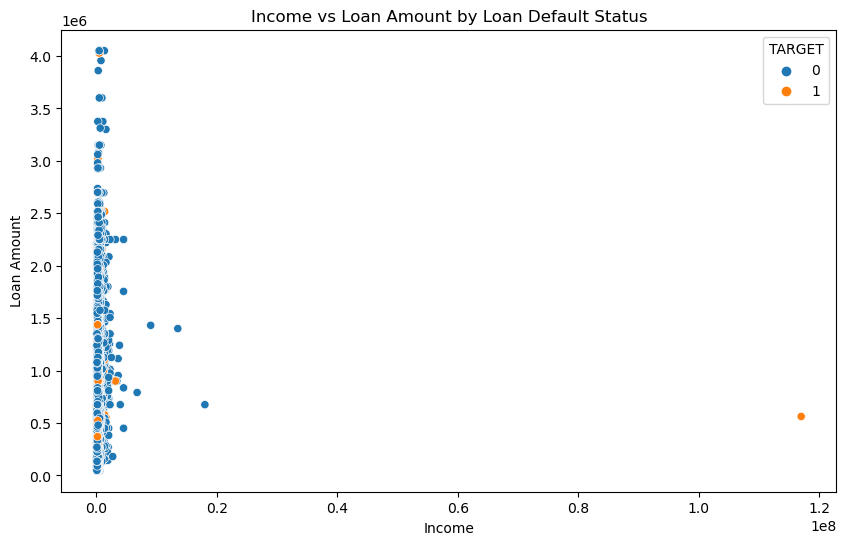

In [22]:
# Scatter plot of Income vs Loan Amount segmented by default status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=application_data_cleaned, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET')
plt.title('Income vs Loan Amount by Loan Default Status')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

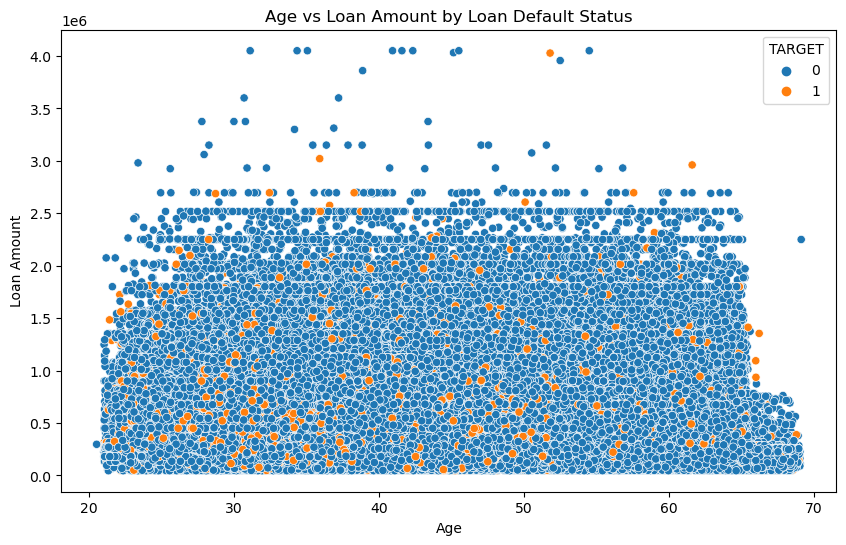

In [23]:
# Scatter plot of Age vs Loan Amount segmented by default status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=application_data_cleaned, x='AGE', y='AMT_CREDIT', hue='TARGET')
plt.title('Age vs Loan Amount by Loan Default Status')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show()

In [24]:
# Segmentation based on target variable
df_default = application_data_cleaned[application_data_cleaned['TARGET'] == 1]
df_non_default = application_data_cleaned[application_data_cleaned['TARGET'] == 0]

In [25]:
# Correlation for clients with payment difficulties
correlation_default = df_default.corr()
top_10_corr_default = correlation_default.unstack().sort_values(ascending=False).drop_duplicates().head(10)
print("Top 10 Correlations for Clients with Payment Difficulties:")
print(top_10_corr_default)

C:\Users\vardh\AppData\Local\Temp\ipykernel_8696\1866404319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_default = df_default.corr()


Top 10 Correlations for Clients with Payment Difficulties:
SK_ID_CURR                   SK_ID_CURR                     1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998270
AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869016
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752295
AMT_CREDIT                   AMT_ANNUITY                    0.752195
dtype: float64


In [26]:
# Correlation for clients without payment difficulties
correlation_non_default = df_non_default.corr()
top_10_corr_non_default = correlation_non_default.unstack().sort_values(ascending=False).drop_duplicates().head(10)
print("Top 10 Correlations for Clients Without Payment Difficulties:")
print(top_10_corr_non_default)

C:\Users\vardh\AppData\Local\Temp\ipykernel_8696\3347966354.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_non_default = df_non_default.corr()


Top 10 Correlations for Clients Without Payment Difficulties:
SK_ID_CURR                   SK_ID_CURR                    1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      0.998510
AMT_CREDIT                   AMT_GOODS_PRICE               0.987022
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950149
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.859371
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.830381
AMT_GOODS_PRICE              AMT_ANNUITY                   0.776421
AMT_CREDIT                   AMT_ANNUITY                   0.771297
dtype: float64


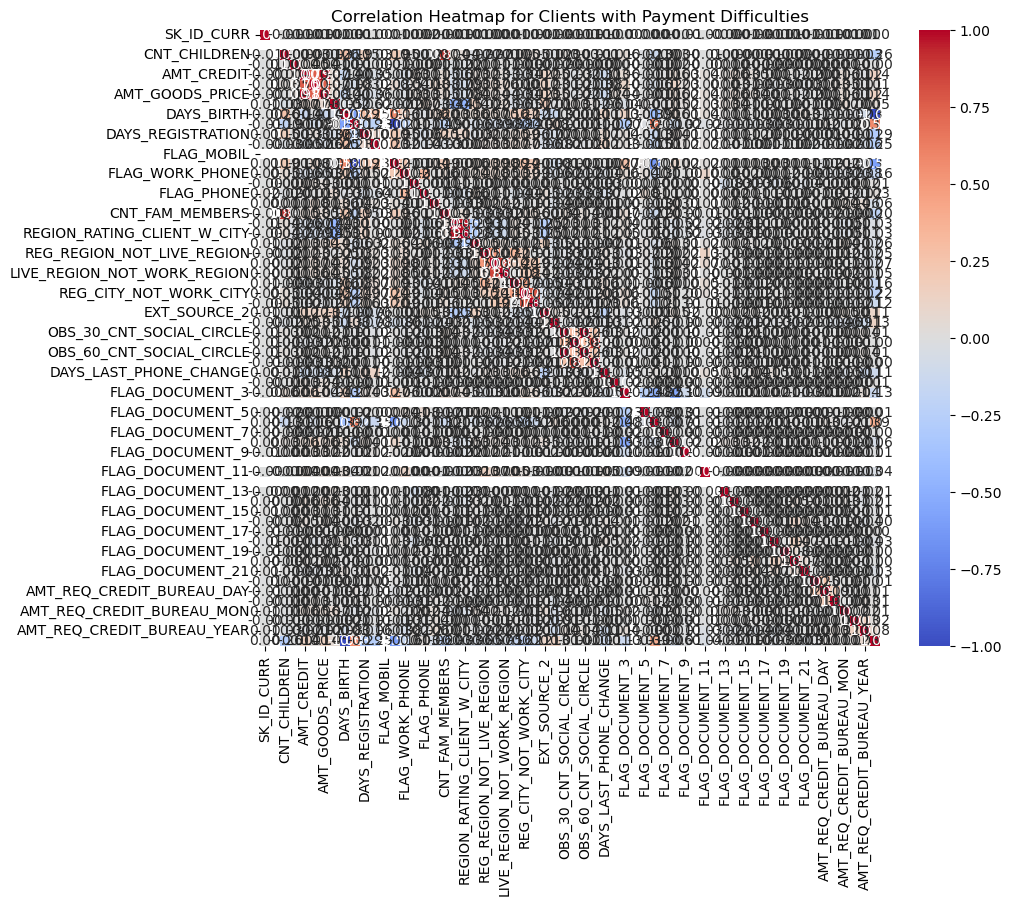

In [27]:
# Heatmap for top correlations in clients with payment difficulties
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_default, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Clients with Payment Difficulties')
plt.show()

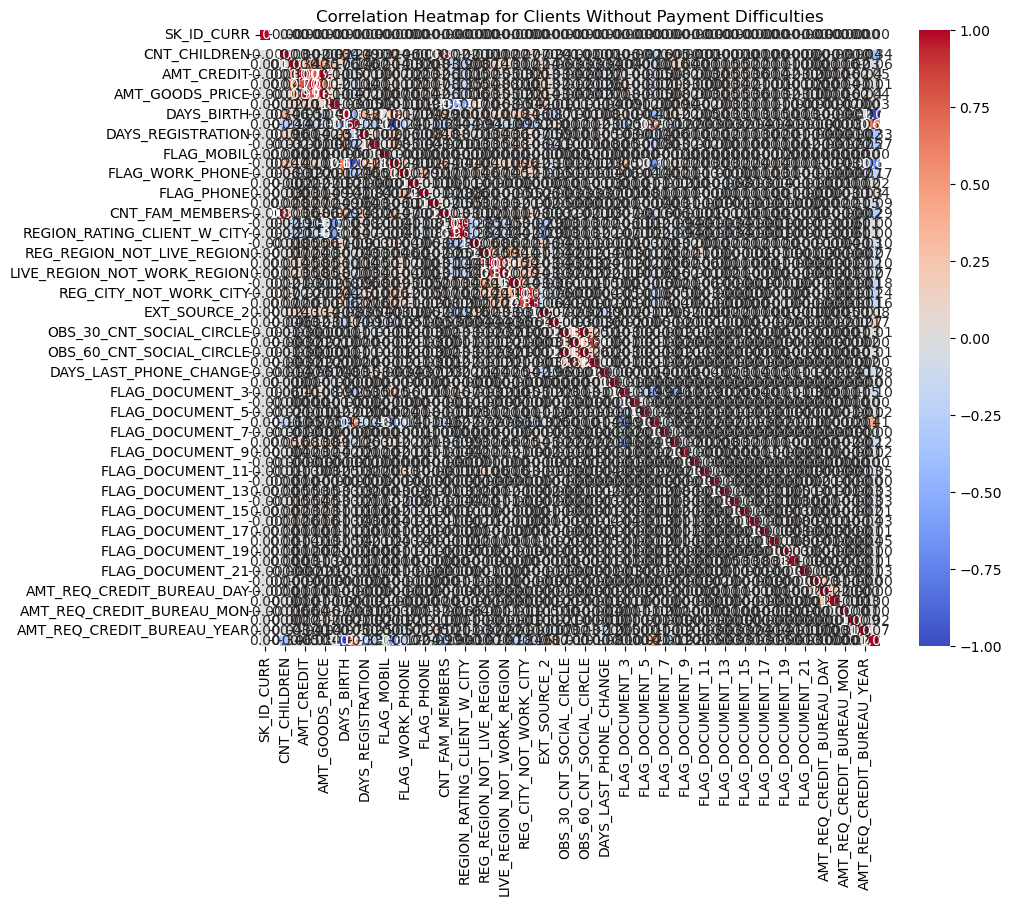

In [28]:
# Heatmap for top correlations in clients without payment difficulties
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_non_default, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Clients Without Payment Difficulties')
plt.show()
